In [46]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [47]:
def cat_name(x):
    if x=='NORMAL GALAXIES: DIFFUSE EMISSION' or x=='NORMAL GALAXIES: X-RAY POPULATIONS':
        return 'NORMAL GALAXIES'
    elif x=='NORMAL STARS AND WD':
        return 'STARS AND WD'
    else:
        return x

In [48]:
def find_word(x,word):
    if word in x:
        return True
    else:
        return False

In [49]:
df=pd.read_csv('cycle_01.csv')
df2=pd.read_csv('all_large.csv')

In [50]:
df2=df2.drop(['Type','Unnamed: 0'],1)

In [53]:
df2.rename(columns={'Time (ks)':'Time'},inplace=True)
df2=df2[df2['Category']!='Category']
df2['Year']=map(lambda x: '20'+x[0:2], df2['Proposal Number'])
df2=df2.fillna('Nan')
df2.Category=map(lambda x: x.strip(),df2.Category)
df2.replace('Nan',0)
df2.Category=df2.Category.apply(cat_name)
df2['Time']=df2['Time'].apply(float)
df2['Year']=df2['Year'].apply(float)
df2['PI Name'] = map(lambda x: x.upper().split()[-1], df2['PI Name'])


In [54]:
df2[df2['Proposal Number']=='03600940']

,Proposal Number,Category,PI Name,Time,Title,Year
175,03600940,NORMAL GALAXIES,BAGANOFF,518.5,MONITORING THE EXTREME X-RAY FLARING OF SAGITT...,2003.0


In [55]:
for i in range(16):
    dfi=pd.read_csv('cycle_%02i.csv'%(i+2))
    dfi.rename(columns={'Time (ks)':'Time'},inplace=True)
    dfi['Year']=int('20'+'%02i'%(i+2))
    df=pd.concat([df,dfi])

In [56]:
df=df.drop(['Type','Unnamed: 0'],1)
df=df[df['Category']!='Category']
df=df.set_index(np.arange(3662))
df=df.fillna('Nan')
df.Category=map(lambda x: x.strip(),df.Category)
df.replace('Nan',0)
df.Category=df.Category.apply(cat_name)
df['Time']=df['Time'].apply(float)
df['PI Name'] = map(lambda x: x.upper().split()[-1], df['PI Name'])
df['Title'] = map(lambda x: x.upper(), df['Title'])

In [72]:
def str_year(year):
    return '%i' % year

In [71]:
dff=pd.concat([df,df2])
dff=dff.set_index(np.arange(3849))
dff['Year']=dff['Year']-2.
dff['Year']=dff['Year'].apply(str_year)
print dff.shape
dff=dff.drop_duplicates(subset='Proposal Number',keep='first')
print dff.shape

(3849, 6)
(3786, 6)


In [73]:
dff[map(lambda x: find_word(x,'EARTH'), dff.Title)]

,Category,PI Name,Proposal Number,Time,Title,Year
633,SOLAR SYSTEM,GLADSTONE,3108123,1.0,A SEARCH FOR SOFT X-RAY AURORAS ON EARTH,2001
1193,SOLAR SYSTEM,ELSNER,5100445,12.0,A SEARCH FOR SOFT X-RAY AURORAS ON EARTH,2003
2656,STARS AND WD,LISSE,12200733,40.0,CHARACTERIZING THE X-RAY RADIATION FIELD IN TH...,2010
3502,STARS AND WD,MILLER,16200348,21.0,ATMOSPHERIC HEATING IN AN IRRADIATED TRANSITIN...,2014


In [74]:
find_word(dff.Title[0],'VENUS')

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ebecf50>]], dtype=object)

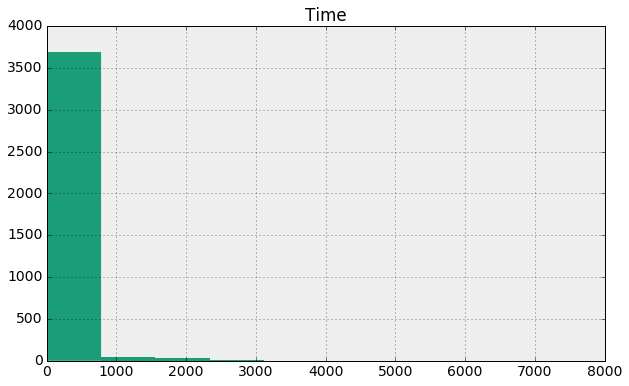

In [92]:
dff.hist('Time')

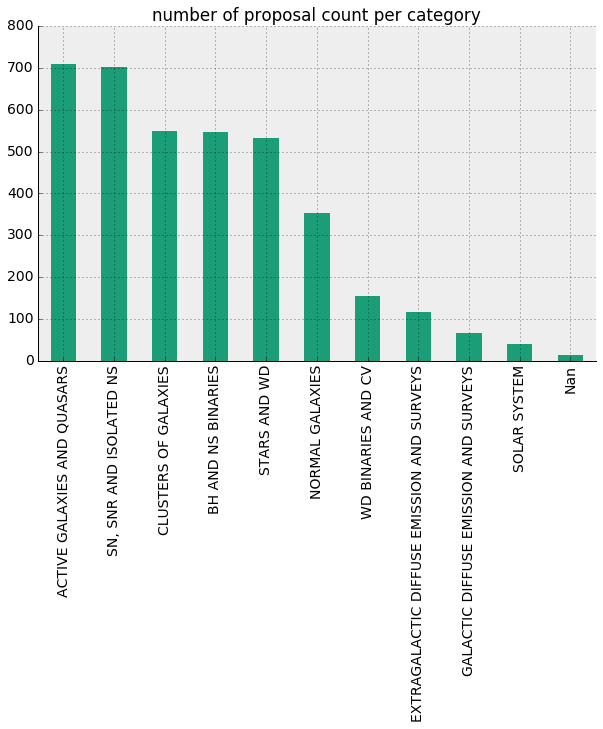

In [95]:
dff.Category.value_counts().plot(kind='bar')
plt.title('number of proposal count per category')
remove_border()

In [96]:
dff.Category[dff.Category!='Nan'].value_counts()

ACTIVE GALAXIES AND QUASARS                   709
SN, SNR AND ISOLATED NS                       703
CLUSTERS OF GALAXIES                          548
BH AND NS BINARIES                            547
STARS AND WD                                  533
NORMAL GALAXIES                               352
WD BINARIES AND CV                            155
EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS    117
GALACTIC DIFFUSE EMISSION AND SURVEYS          66
SOLAR SYSTEM                                   41
Name: Category, dtype: int64

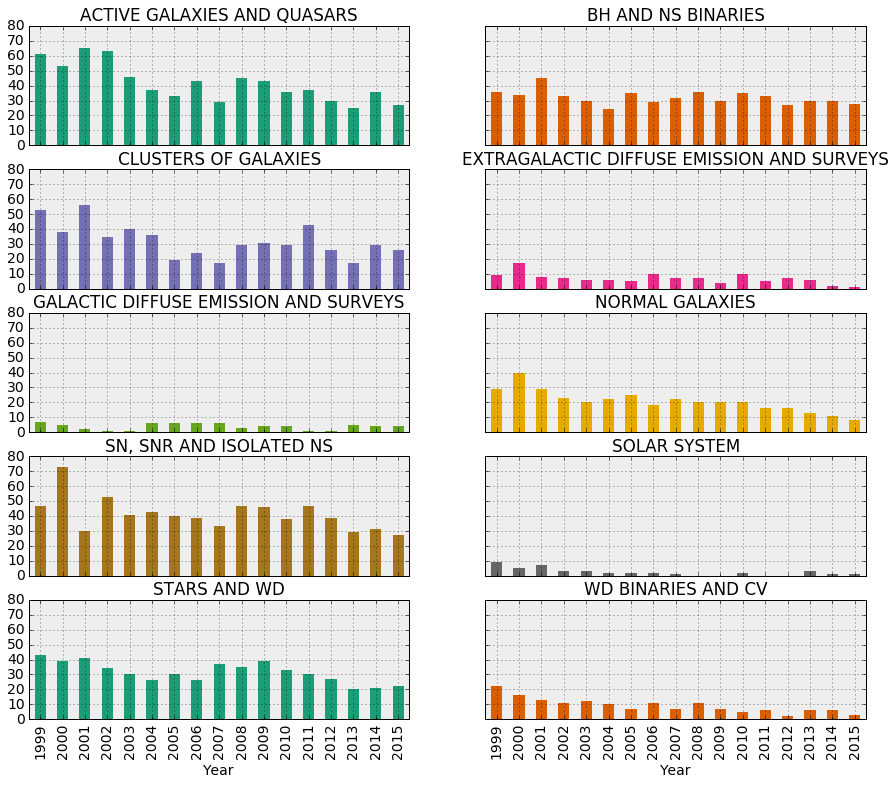

In [97]:
cat_count=dff.Category[dff.Category!='Nan'].groupby(dff['Year']).value_counts();
cat_count.unstack().plot(kind='bar',figsize=(15,15),sharey=True,subplots=True,legend=False,layout=(6,2));

In [31]:
dff['Time'].groupby(dff['Category']).apply(sum)#/df.Category.value_counts()
#df.groupby(by=['Category'])['Time']

Category
ACTIVE GALAXIES AND QUASARS                    86171.676667
BH AND NS BINARIES                             64574.620000
CLUSTERS OF GALAXIES                          106008.280000
EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS     46059.800000
GALACTIC DIFFUSE EMISSION AND SURVEYS          11449.500000
NORMAL GALAXIES                                48792.664000
Nan                                              981.000000
SN, SNR AND ISOLATED NS                       112289.620000
SOLAR SYSTEM                                    2951.150000
STARS AND WD                                   57738.440000
WD BINARIES AND CV                             14827.740000
dtype: float64

In [18]:
dff['Time'].groupby(dff['Year']).apply(sum)
#plt.plot(dff['Time'].groupby(dff['Year']).apply(sum))
#dff['Time'].groupby(dff['Year']).hist(bins=30,log=True);

Year
1999.0    46044.170000
2000.0    32252.010000
2001.0    38655.440000
2002.0    28166.540000
2003.0    33214.440000
2004.0    28537.370000
2005.0    31798.660000
2006.0    28034.000000
2007.0    30176.200000
2008.0    28684.666667
2009.0    31526.374000
2010.0    31466.300000
2011.0    44078.180000
2012.0    41469.800000
2013.0    25724.000000
2014.0    27395.400000
2015.0    24620.940000
dtype: float64

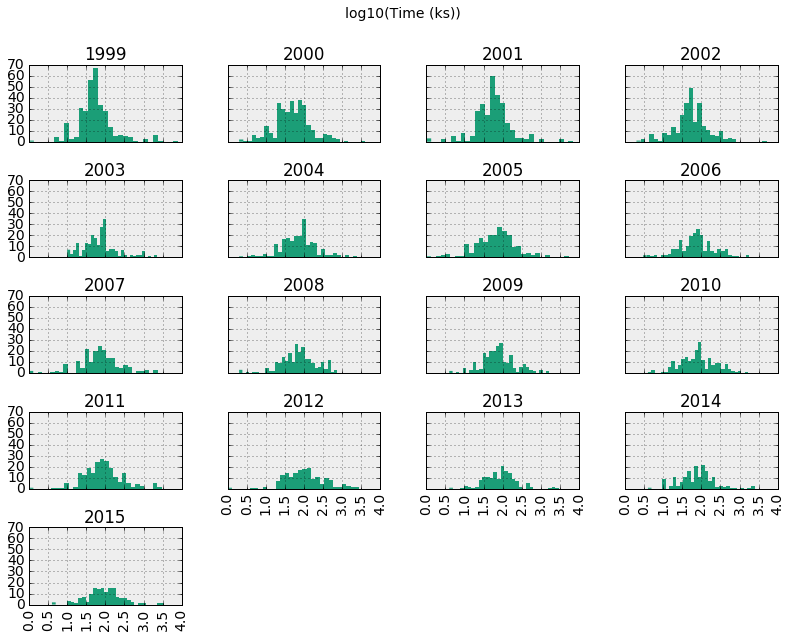

In [99]:
np.log10(dff['Time']).hist(by=dff['Year'],sharex=True,sharey=True,figsize=(13,10),bins=30);
plt.suptitle('log10(Time (ks))')

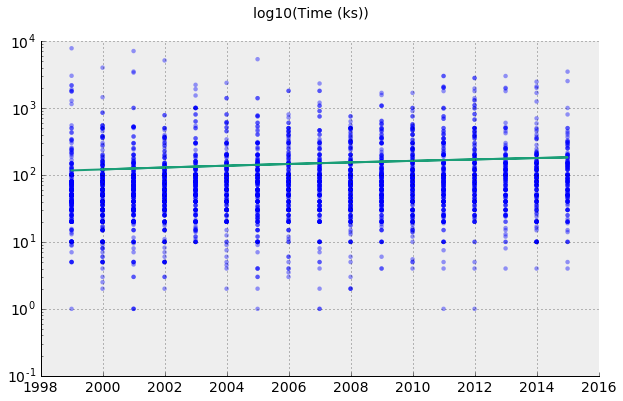

In [20]:
plt.scatter(dff['Year'],dff['Time'],alpha=0.4)
plt.yscale('log')
plt.suptitle('log10(Time (ks))')
x=dff['Year']
y=dff['Time']
z=np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
remove_border(left=True, bottom=True)

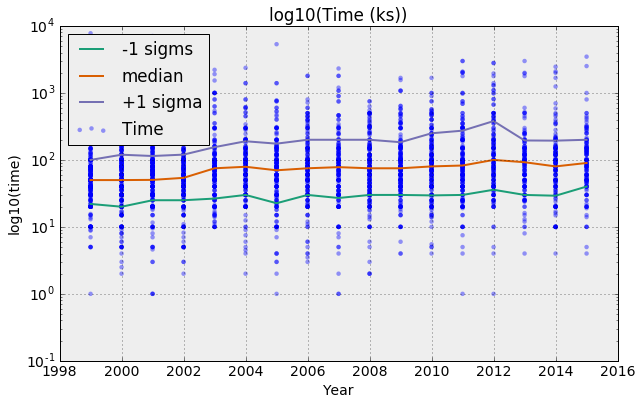

In [36]:
p16=dff['Time'].groupby(dff['Year']).apply(np.percentile,16)
p50=dff['Time'].groupby(dff['Year']).apply(np.percentile,50)
p84=dff['Time'].groupby(dff['Year']).apply(np.percentile,84)
plt.plot(p16,label='-1 sigms')
plt.plot(p50,label='median')
plt.plot(p84,label='+1 sigma')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('log10(time)')
plt.scatter(dff['Year'],dff['Time'],alpha=0.4)
plt.title('log10(Time (ks))')
plt.legend(loc='best')

#plt.ylim(0,300)


In [42]:
dff.loc[dff['PI Name']=='NANDRA']

,Category,PI Name,Proposal Number,Time,Title,Year
191,ACTIVE GALAXIES AND QUASARS,NANDRA,1700358,80.0,PROBING RELATIVISTIC OUTFLOWS IN EXTREME NLS1,1999.0
934,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,3900462,200.0,THE X-RAY UNIVERSE AT HIGH REDSHIFT,2001.0
936,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,3900608,175.0,THE SHEEP SURVEY: WHAT KIND OF OBJECTS MAKE TH...,2001.0
1559,ACTIVE GALAXIES AND QUASARS,NANDRA,6700612,55.0,BRINGING IN THE LAST SHEEP,2004.0
1607,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,6900444,1400.0,DEEP CHANDRA IMAGING OF THE EXTENDED GROTH STR...,2004.0
1608,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,6900602,150.0,THE SPECTRAL ENERGY DISTRIBUTIONS OF AGN: A SH...,2004.0
2008,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,8900627,200.0,AGN IN THE COSMIC WEB: A PROTO-CLUSTER AT Z=2.3,2006.0
2194,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,9900660,1800.0,THE EVOLUTION OF FAINT AGN AT HIGH REDSHIFT,2007.0
3774,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,09900660,1800.0,The Evolution of Faint AGN at High Redshift,2007.0
3803,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,06900444,1400.0,Deep Chandra Imaging of the Extended Groth Str...,2004.0


In [22]:
zip(dff['PI Name'].value_counts().index,dff['PI Name'].value_counts().values)

[('GARMIRE', 172),
 ('MURRAY', 150),
 ('CANIZARES', 64),
 ('PREDEHL', 58),
 ('POOLEY', 38),
 ('FABIAN', 36),
 ('MILLER', 32),
 ('MENDEZ', 29),
 ('BRANDT', 28),
 ('SARAZIN', 27),
 ('REYNOLDS', 26),
 ('CHAKRABARTY', 26),
 ('KASPI', 26),
 ('HUGHES', 25),
 ('SLANE', 23),
 ('JONKER', 23),
 ('TOWNSLEY', 23),
 ('HALPERN', 22),
 ('WIJNANDS', 22),
 ('BURROWS', 21),
 ('WANG', 21),
 ('JONES', 20),
 ('IRWIN', 19),
 ('SMITH', 19),
 ('KAASTRA', 19),
 ('HARDCASTLE', 19),
 ('HARRIS', 19),
 ('ALLEN', 18),
 ('TOMSICK', 18),
 ('LEWIN', 18),
 ('PAVLOV', 18),
 ('FABBIANO', 17),
 ('AYRES', 16),
 ('FORMAN', 16),
 ('CORBEL', 16),
 ('KAARET', 16),
 ('ROMANI', 15),
 ('NAN', 15),
 ('SKINNER', 15),
 ('KRAFT', 15),
 ('ROBERTS', 15),
 ('KULKARNI', 15),
 ('GARCIA', 14),
 ('GRINDLAY', 14),
 ('KASTNER', 14),
 ('HOMAN', 13),
 ('DEGENAAR', 13),
 ('VIKHLININ', 13),
 ('GUEDEL', 13),
 ('MARKEVITCH', 13),
 ('CORCORAN', 13),
 ('SANDERS', 13),
 ('CALIBRATION', 12),
 ('LEE', 12),
 ('ZEZAS', 12),
 ('EVANS', 12),
 ('BROWN', 12),

In [23]:
dff[dff['PI Name']=='CHAKRABARTY']

,Category,PI Name,Proposal Number,Time,Title,Year
403,BH AND NS BINARIES,CHAKRABARTY,2400927,5.0,WHERE IS OAO 1657-415?,2000.0
711,BH AND NS BINARIES,CHAKRABARTY,3400979,60.0,RESOLVING THE SOFT EXCESS IN 4U 1850-087,2001.0
725,BH AND NS BINARIES,CHAKRABARTY,3408100,20.0,SPECTROSCOPY OF THE HIGH-LATITUDE ACCRETING MI...,2001.0
1012,BH AND NS BINARIES,CHAKRABARTY,4400876,7.0,SNAPSHOT SURVEY OF FOUR LMXBS,2002.0
1262,BH AND NS BINARIES,CHAKRABARTY,5400958,50.0,HETGS SPECTROSCOPY OF THE ULTRACOMPACT X-RAY D...,2003.0
1469,BH AND NS BINARIES,CHAKRABARTY,6400892,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2004.0
1682,BH AND NS BINARIES,CHAKRABARTY,7400737,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2005.0
1873,BH AND NS BINARIES,CHAKRABARTY,8400666,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2006.0
2085,BH AND NS BINARIES,CHAKRABARTY,9400544,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2007.0
2257,BH AND NS BINARIES,CHAKRABARTY,10400234,3.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2008.0


In [740]:
## the total time committed to the projects